In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from lcls_beamline_toolbox.xraybeamline2d import beam, optics, beamline2d

In [2]:
N = 2048
FOV = 10e-3
dx = FOV/N

E0 = 9500.

beam_params = {
    'photonEnergy': E0,
    'cx': 0e-6,
    'cy': 0e-6,
    'ax': 0.e-6,
    'ay': 0e-6,
    'N': N,
    'sigma_x': 15e-6,
    'sigma_y': 15e-6,
    'z0x': 110,
    'z0y': 110,
    'rangeFactor': 10
}

In [8]:
beam_params['photonEnergy'] = 9550

b1 = beam.Beam(beam_params=beam_params)

mr1l0 = optics.FlatMirror('mr1l0', length=1, alpha=2.1e-3, z=740,delta=0e-9)
mr2l0 = optics.FlatMirror('mr2l0', length=1, alpha=2.1e-3, z=747.286)

# Stack of 20 CRLs for tight focus
crl_list = []
for i in range(10):
    crl_list.append(optics.CRL('crl%d' % i, z=800+i*1e-3,dx=0e-6))

IP = optics.PPM('IP', FOV=4e-6, z=800.671, N=256)

upstream_YAG = optics.PPM('YAG1',FOV=2e-3,z=800.02 + 1e-3, N=256)
# downstream_YAG = optics.PPM('YAG', FOV=3e-3, z=803)


devices = [mr1l0,mr2l0, IP,upstream_YAG]
devices = devices + crl_list

XPP = beamline2d.Beamline(devices)

FWHM in x: 358.02487499190096 microns
FWHM in y: 358.02487499190096 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
x is focused
y is focused


mr1l0
drift1
zRx: 156415615.18 microns
zRy: 156415615.18 microns
remaining distance: 7286000.00 microns
goal for zx: 117286000.00 microns
current zx: 110000000.00 microns
goal for zy: 117286000.00 microns
current zy: 110000000.00 microns
mr2l0
drift2
zRx: 156415615.18 microns
zRy: 156415615.18 microns
remaining distance: 52714000.00 microns
goal for zx: 170000000.00 microns
current zx: 117286000.00 microns
goal for zy: 170000000.00 microns
current zy: 117286000.00 microns
x becomes unfocused
y becomes unfocused
zRx: 156415615.18 microns
zRy: 156415615.18 microns
remaining distance: 13584384.82 microns
goal for zx: 170000000.00 microns
current zx: 156415615.18 microns
goal for zy: 170000000.00 microns
current zy: 156415615.18 microns
crl0
focal length: 6.69
drift3
zRx: 262071.24 microns
zRy: 262071.24 microns
remaining distance: 1000.00 microns
goal for zx: -6959262.34 microns
current zx: -6960262.34 microns
goal for zy: -6959262.34 microns
current zy: -6960262.34 microns
crl1
focal len

<IPython.core.display.Javascript object>


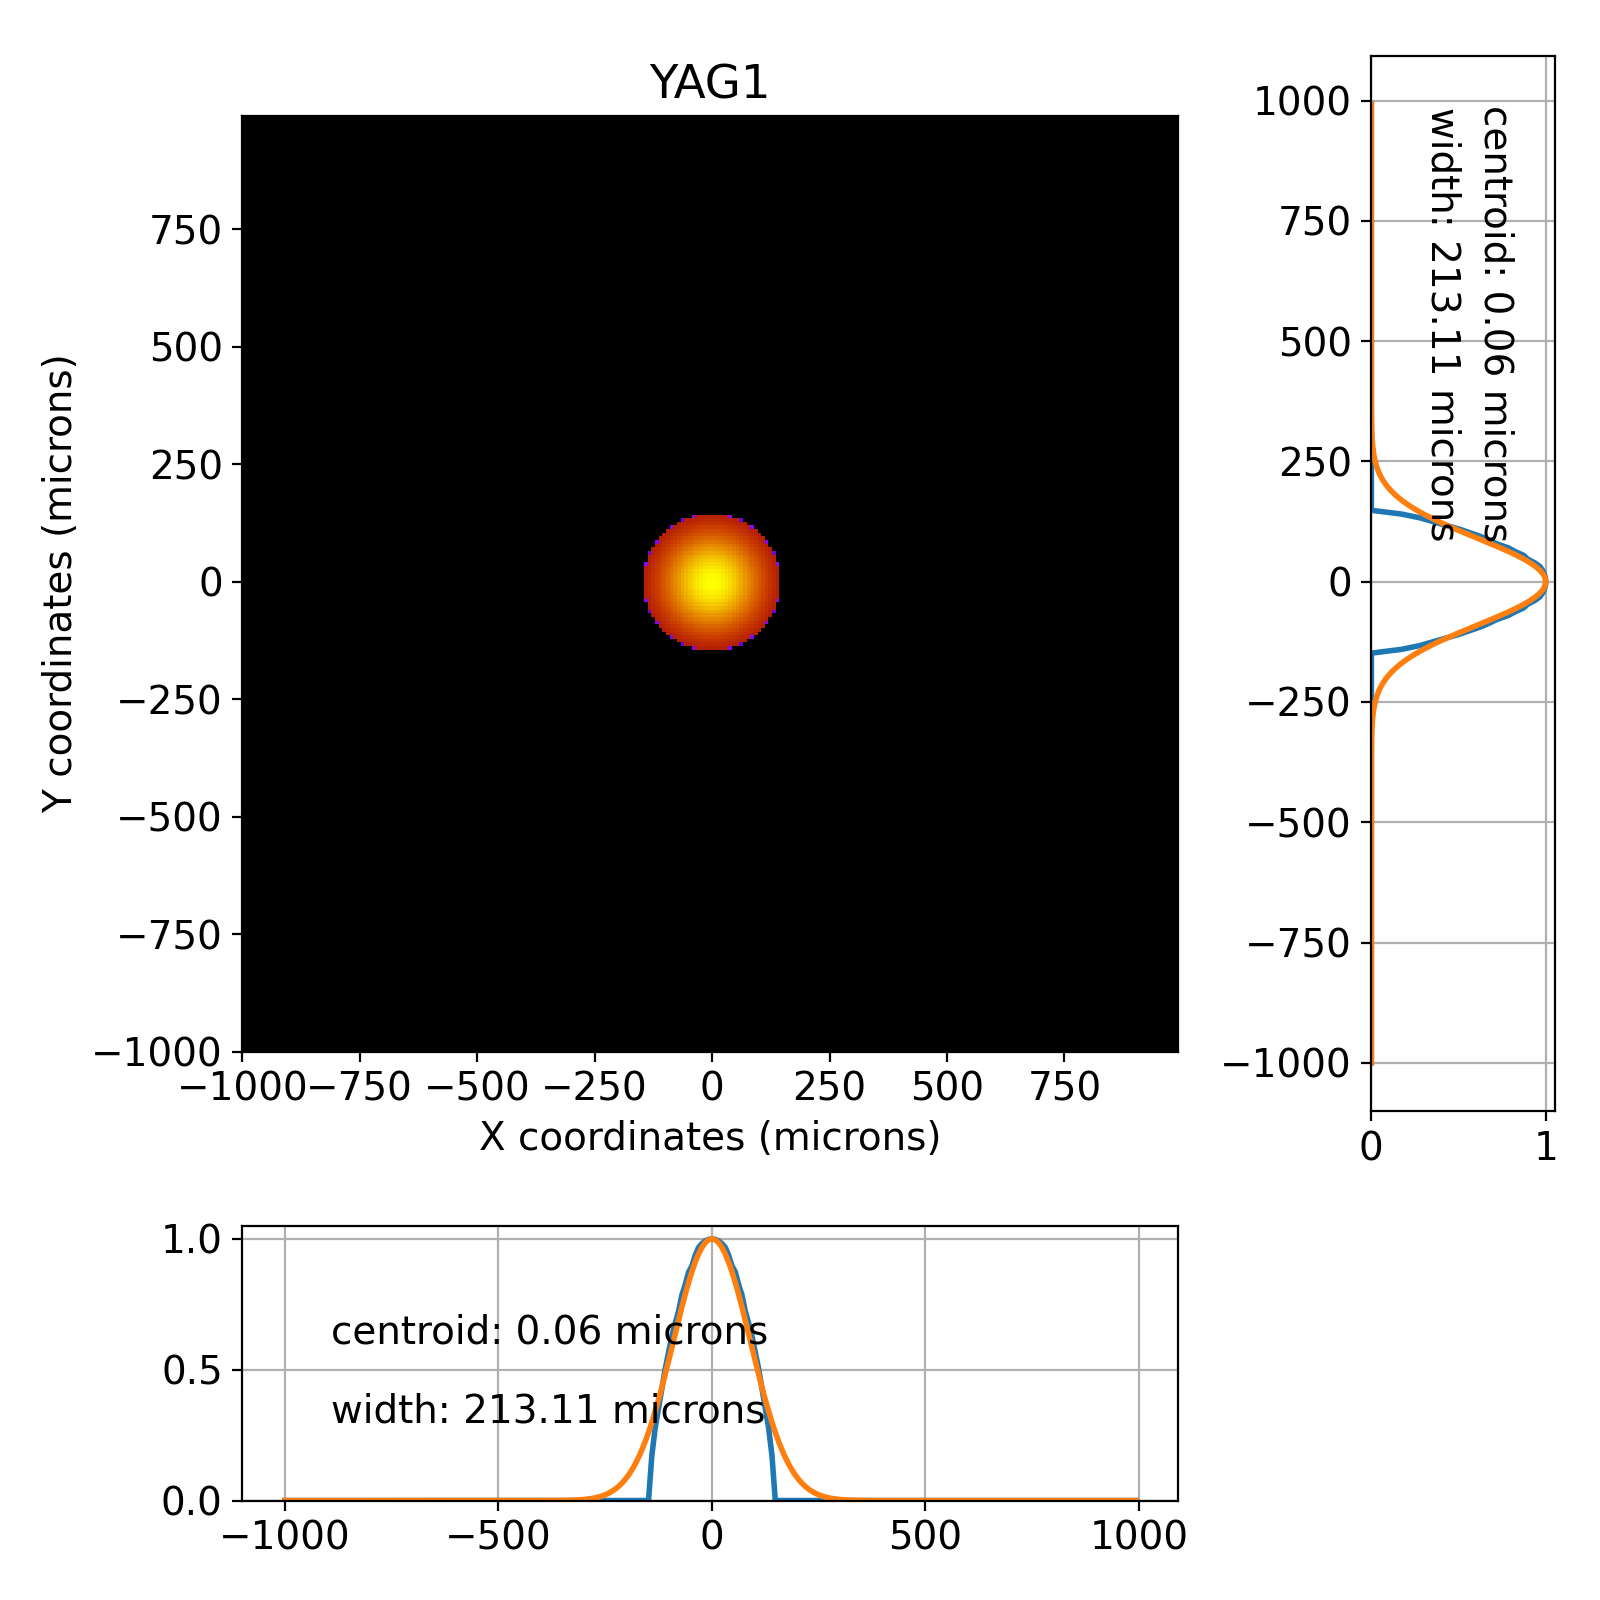

<IPython.core.display.Javascript object>


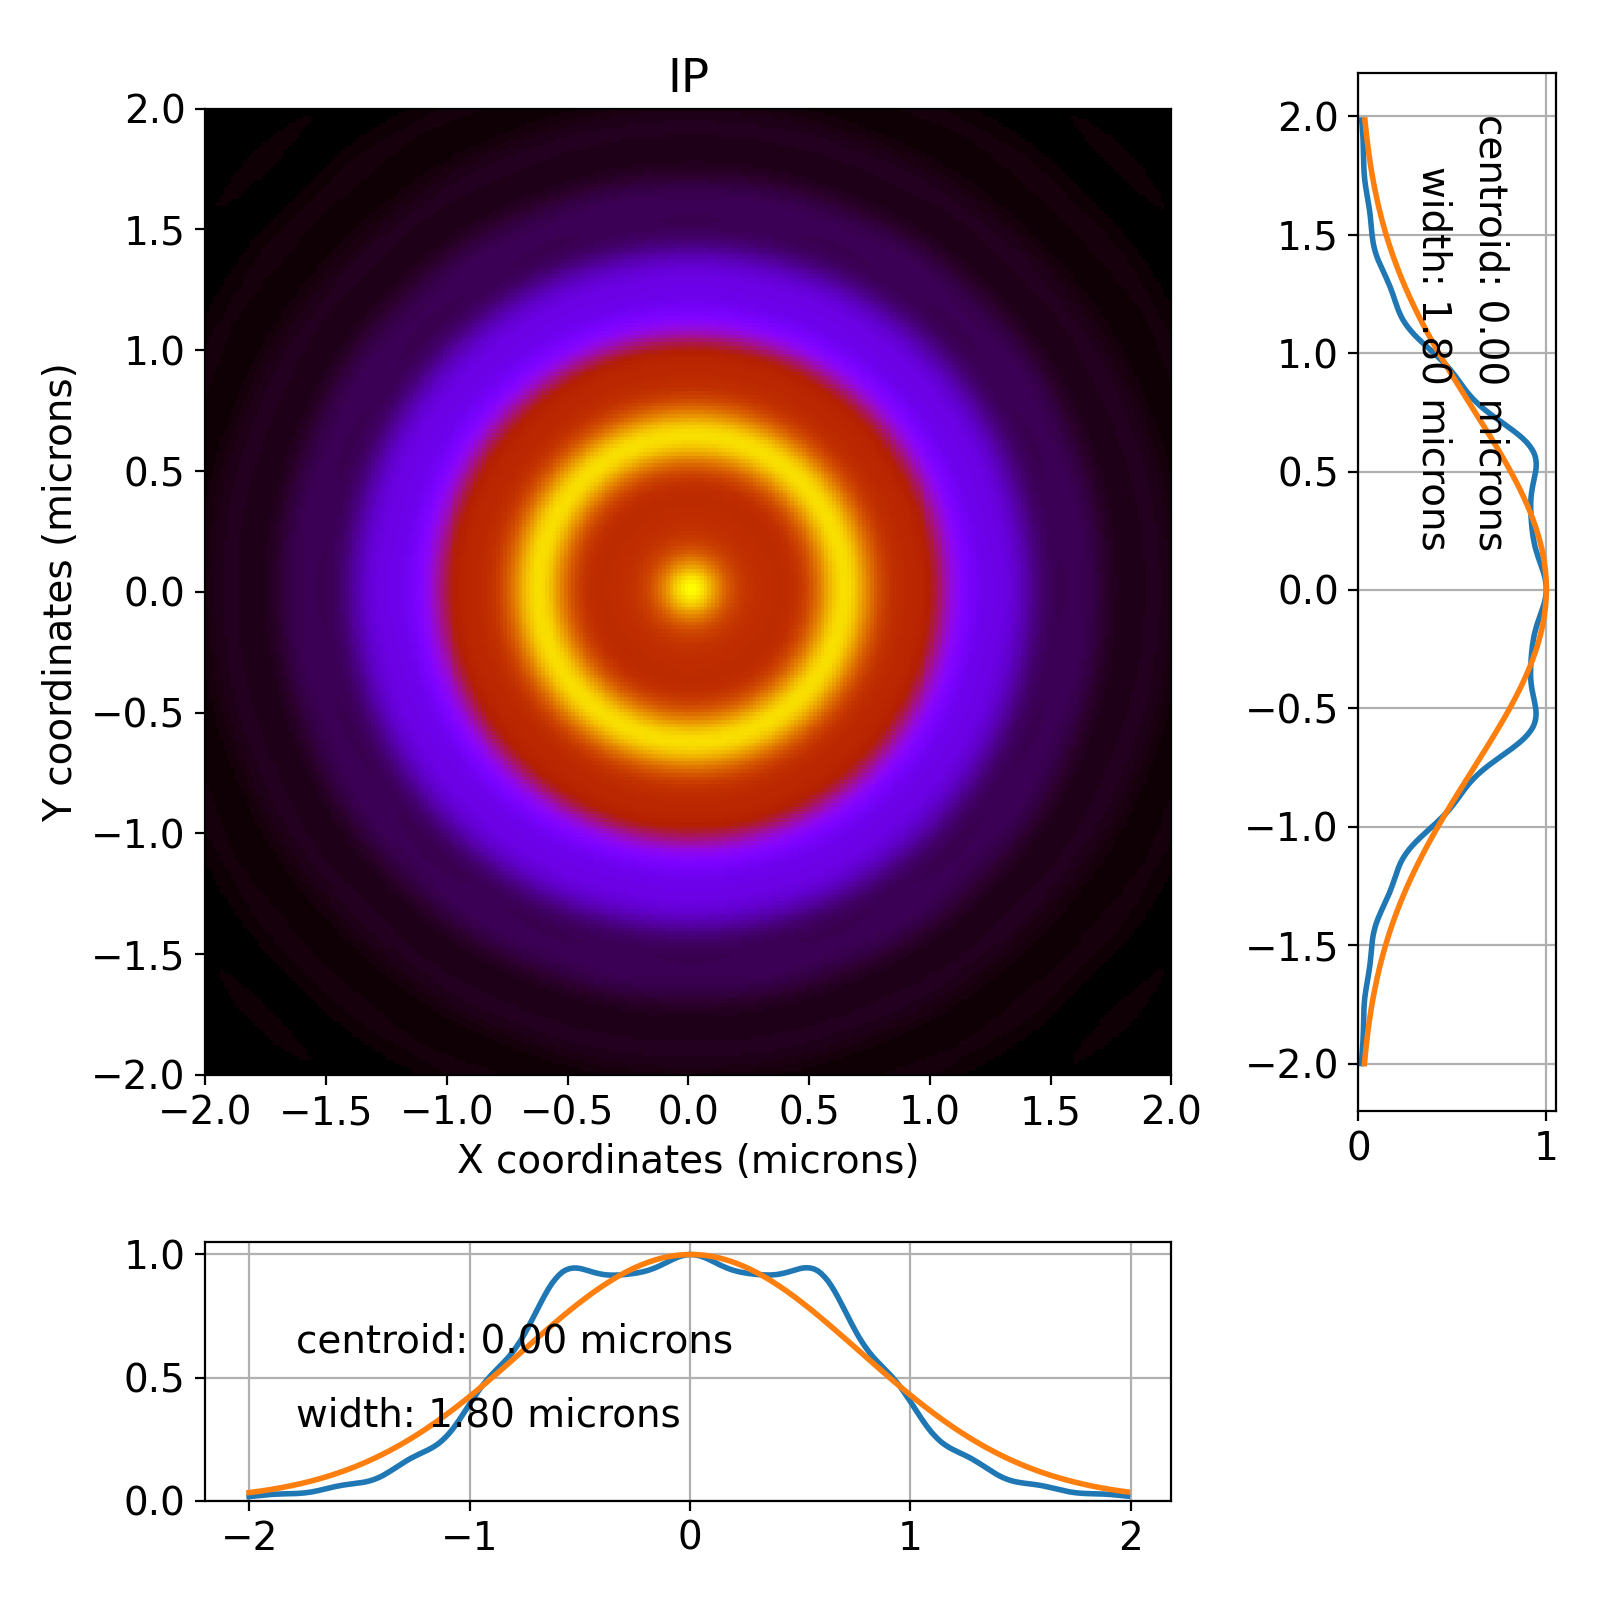

In [9]:
b2 = XPP.propagate_beamline(b1)
XPP.YAG1.view_beam()
XPP.IP.view_beam()
# XPP.YAG.view_beam()

In [10]:
beam_params['photonEnergy'] = 9500

pulse_test = beam.Pulse(beam_params=beam_params, tau=.05, time_window=.5)

In [11]:
pulse_test.propagate(beamline=XPP, screen_names=['IP','YAG1'])

FWHM in x: 363.45403515600356 microns
FWHM in y: 363.45403515600356 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
x is focused
y is focused
mr1l0
drift1
zRx: 154073532.06 microns
zRy: 154073532.06 microns
remaining distance: 7286000.00 microns
goal for zx: 117286000.00 microns
current zx: 110000000.00 microns
goal for zy: 117286000.00 microns
current zy: 110000000.00 microns
mr2l0
drift2
zRx: 154073532.06 microns
zRy: 154073532.06 microns
remaining distance: 52714000.00 microns
goal for zx: 170000000.00 microns
current zx: 117286000.00 microns
goal for zy: 170000000.00 microns
current zy: 117286000.00 microns
x becomes unfocused
y becomes unfocused
zRx: 154073532.06 microns
zRy: 154073532.06 microns
remaining distance: 15926467.94 microns
goal for zx: 170000000.00 microns
current zx: 154073532.06 microns
goal for zy: 170000000.00 microns
current zy: 154073532.06 microns
crl0
focal length: 6.50
drift3
zRx: 243188.42 microns
zRy: 243188.42 microns
remaining distance

crl2
focal length: 6.52
drift5
zRx: 25886.97 microns
zRy: 25886.97 microns
remaining distance: 1000.00 microns
goal for zx: -2199977.07 microns
current zx: -2200977.07 microns
goal for zy: -2199977.07 microns
current zy: -2200977.07 microns
crl3
focal length: 6.52
drift6
zRx: 14472.72 microns
zRy: 14472.72 microns
remaining distance: 1000.00 microns
goal for zx: -1643949.42 microns
current zx: -1644949.42 microns
goal for zy: -1643949.42 microns
current zy: -1644949.42 microns
crl4
focal length: 6.52
drift7
zRx: 9230.99 microns
zRy: 9230.99 microns
remaining distance: 1000.00 microns
goal for zx: -1311917.54 microns
current zx: -1312917.54 microns
goal for zy: -1311917.54 microns
current zy: -1312917.54 microns
crl5
focal length: 6.52
drift8
zRx: 6397.49 microns
zRy: 6397.49 microns
remaining distance: 1000.00 microns
goal for zx: -1091162.97 microns
current zx: -1092162.97 microns
goal for zy: -1091162.97 microns
current zy: -1092162.97 microns
crl6
focal length: 6.52
drift9
zRx: 4694

crl7
focal length: 6.54
drift10
zRx: 3624.53 microns
zRy: 3624.53 microns
remaining distance: 1000.00 microns
goal for zx: -818684.01 microns
current zx: -819684.01 microns
goal for zy: -818684.01 microns
current zy: -819684.01 microns
crl8
focal length: 6.54
drift11
zRx: 2863.22 microns
zRy: 2863.22 microns
remaining distance: 1000.00 microns
goal for zx: -726642.25 microns
current zx: -727642.25 microns
goal for zy: -726642.25 microns
current zy: -727642.25 microns
crl9
focal length: 6.54
drift12
zRx: 2319.46 microns
zRy: 2319.46 microns
remaining distance: 12000.00 microns
goal for zx: -642012.72 microns
current zx: -654012.72 microns
goal for zy: -642012.72 microns
current zy: -654012.72 microns
YAG1
drift13
zRx: 2319.46 microns
zRy: 2319.46 microns
remaining distance: 650000.00 microns
goal for zx: 7987.28 microns
current zx: -642012.72 microns
goal for zy: 7987.28 microns
current zy: -642012.72 microns
IP
FWHM in x: 361.7551170592888 microns
FWHM in y: 361.7551170592888 microns
F

mr2l0
drift2
zRx: 155088967.52 microns
zRy: 155088967.52 microns
remaining distance: 52714000.00 microns
goal for zx: 170000000.00 microns
current zx: 117286000.00 microns
goal for zy: 170000000.00 microns
current zy: 117286000.00 microns
x becomes unfocused
y becomes unfocused
zRx: 155088967.52 microns
zRy: 155088967.52 microns
remaining distance: 14911032.48 microns
goal for zx: 170000000.00 microns
current zx: 155088967.52 microns
goal for zy: 170000000.00 microns
current zy: 155088967.52 microns
crl0
focal length: 6.58
drift3
zRx: 251180.10 microns
zRy: 251180.10 microns
remaining distance: 1000.00 microns
goal for zx: -6842041.52 microns
current zx: -6843041.52 microns
goal for zy: -6842041.52 microns
current zy: -6843041.52 microns
crl1
focal length: 6.58
drift4
zRx: 60350.63 microns
zRy: 60350.63 microns
remaining distance: 1000.00 microns
goal for zx: -3352775.60 microns
current zx: -3353775.60 microns
goal for zy: -3352775.60 microns
current zy: -3353775.60 microns
crl2
focal 

crl3
focal length: 6.60
drift6
zRx: 14938.11 microns
zRy: 14938.11 microns
remaining distance: 1000.00 microns
goal for zx: -1664763.64 microns
current zx: -1665763.64 microns
goal for zy: -1664763.64 microns
current zy: -1665763.64 microns
crl4
focal length: 6.60
drift7
zRx: 9527.30 microns
zRy: 9527.30 microns
remaining distance: 1000.00 microns
goal for zx: -1328504.25 microns
current zx: -1329504.25 microns
goal for zy: -1328504.25 microns
current zy: -1329504.25 microns
crl5
focal length: 6.60
drift8
zRx: 6602.60 microns
zRy: 6602.60 microns
remaining distance: 1000.00 microns
goal for zx: -1104949.49 microns
current zx: -1105949.49 microns
goal for zy: -1104949.49 microns
current zy: -1105949.49 microns
crl6
focal length: 6.60
drift9
zRx: 4845.03 microns
zRy: 4845.03 microns
remaining distance: 1000.00 microns
goal for zx: -945527.87 microns
current zx: -946527.87 microns
goal for zy: -945527.87 microns
current zy: -946527.87 microns
crl7
focal length: 6.60
drift10
zRx: 3707.10 m

crl6
focal length: 6.63
drift9
zRx: 4889.11 microns
zRy: 4889.11 microns
remaining distance: 1000.00 microns
goal for zx: -948952.70 microns
current zx: -949952.70 microns
goal for zy: -948952.70 microns
current zy: -949952.70 microns
crl7
focal length: 6.63
drift10
zRx: 3740.80 microns
zRy: 3740.80 microns
remaining distance: 1000.00 microns
goal for zx: -829064.62 microns
current zx: -830064.62 microns
goal for zy: -829064.62 microns
current zy: -830064.62 microns
crl8
focal length: 6.63
drift11
zRx: 2955.00 microns
zRy: 2955.00 microns
remaining distance: 1000.00 microns
goal for zx: -735859.53 microns
current zx: -736859.53 microns
goal for zy: -735859.53 microns
current zy: -736859.53 microns
crl9
focal length: 6.63
drift12
zRx: 2393.75 microns
zRy: 2393.75 microns
remaining distance: 12000.00 microns
goal for zx: -650301.13 microns
current zx: -662301.13 microns
goal for zy: -650301.13 microns
current zy: -662301.13 microns
YAG1
drift13
zRx: 2393.75 microns
zRy: 2393.75 microns
r

YAG1
drift13
zRx: 2415.35 microns
zRy: 2415.35 microns
remaining distance: 650000.00 microns
goal for zx: -2682.70 microns
current zx: -652682.70 microns
goal for zy: -2682.70 microns
current zy: -652682.70 microns
IP
FWHM in x: 358.7368962189446 microns
FWHM in y: 358.7368962189446 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
x is focused
y is focused
mr1l0
drift1
zRx: 156104402.99 microns
zRy: 156104402.99 microns
remaining distance: 7286000.00 microns
goal for zx: 117286000.00 microns
current zx: 110000000.00 microns
goal for zy: 117286000.00 microns
current zy: 110000000.00 microns
mr2l0
drift2
zRx: 156104402.99 microns
zRy: 156104402.99 microns
remaining distance: 52714000.00 microns
goal for zx: 170000000.00 microns
current zx: 117286000.00 microns
goal for zy: 170000000.00 microns
current zy: 117286000.00 microns
x becomes unfocused
y becomes unfocused
zRx: 156104402.99 microns
zRy: 156104402.99 microns
remaining distance: 13895597.01 microns
goal for zx: 

crl1
focal length: 6.68
drift4
zRx: 62882.96 microns
zRy: 62882.96 microns
remaining distance: 1000.00 microns
goal for zx: -3408173.70 microns
current zx: -3409173.70 microns
goal for zy: -3408173.70 microns
current zy: -3409173.70 microns
crl2
focal length: 6.68
drift5
zRx: 27584.80 microns
zRy: 27584.80 microns
remaining distance: 1000.00 microns
goal for zx: -2256304.61 microns
current zx: -2257304.61 microns
goal for zy: -2256304.61 microns
current zy: -2257304.61 microns
crl3
focal length: 6.68
drift6
zRx: 15419.25 microns
zRy: 15419.25 microns
remaining distance: 1000.00 microns
goal for zx: -1685919.48 microns
current zx: -1686919.48 microns
goal for zy: -1685919.48 microns
current zy: -1686919.48 microns
crl4
focal length: 6.68
drift7
zRx: 9833.62 microns
zRy: 9833.62 microns
remaining distance: 1000.00 microns
goal for zx: -1345362.36 microns
current zx: -1346362.36 microns
goal for zy: -1345362.36 microns
current zy: -1346362.36 microns
crl5
focal length: 6.68
drift8
zRx: 68

crl6
focal length: 6.71
drift9
zRx: 5045.84 microns
zRy: 5045.84 microns
remaining distance: 1000.00 microns
goal for zx: -960979.07 microns
current zx: -961979.07 microns
goal for zy: -960979.07 microns
current zy: -961979.07 microns
crl7
focal length: 6.71
drift10
zRx: 3860.61 microns
zRy: 3860.61 microns
remaining distance: 1000.00 microns
goal for zx: -839572.92 microns
current zx: -840572.92 microns
goal for zy: -839572.92 microns
current zy: -840572.92 microns
crl8
focal length: 6.71
drift11
zRx: 3049.57 microns
zRy: 3049.57 microns
remaining distance: 1000.00 microns
goal for zx: -745190.05 microns
current zx: -746190.05 microns
goal for zy: -745190.05 microns
current zy: -746190.05 microns
crl9
focal length: 6.71
drift12
zRx: 2470.30 microns
zRy: 2470.30 microns
remaining distance: 12000.00 microns
goal for zx: -658691.29 microns
current zx: -670691.29 microns
goal for zy: -658691.29 microns
current zy: -670691.29 microns
YAG1
drift13
zRx: 2470.30 microns
zRy: 2470.30 microns
r

mr1l0
drift1
zRx: 157119838.46 microns
zRy: 157119838.46 microns
remaining distance: 7286000.00 microns
goal for zx: 117286000.00 microns
current zx: 110000000.00 microns
goal for zy: 117286000.00 microns
current zy: 110000000.00 microns
mr2l0
drift2
zRx: 157119838.46 microns
zRy: 157119838.46 microns
remaining distance: 52714000.00 microns
goal for zx: 170000000.00 microns
current zx: 117286000.00 microns
goal for zy: 170000000.00 microns
current zy: 117286000.00 microns
x becomes unfocused
y becomes unfocused
zRx: 157119838.46 microns
zRy: 157119838.46 microns
remaining distance: 12880161.54 microns
goal for zx: 170000000.00 microns
current zx: 157119838.46 microns
goal for zy: 170000000.00 microns
current zy: 157119838.46 microns
crl0
focal length: 6.75
drift3
zRx: 268065.44 microns
zRy: 268065.44 microns
remaining distance: 1000.00 microns
goal for zx: -7022695.37 microns
current zx: -7023695.37 microns
goal for zy: -7022695.37 microns
current zy: -7023695.37 microns
crl1
focal len

<IPython.core.display.Javascript object>


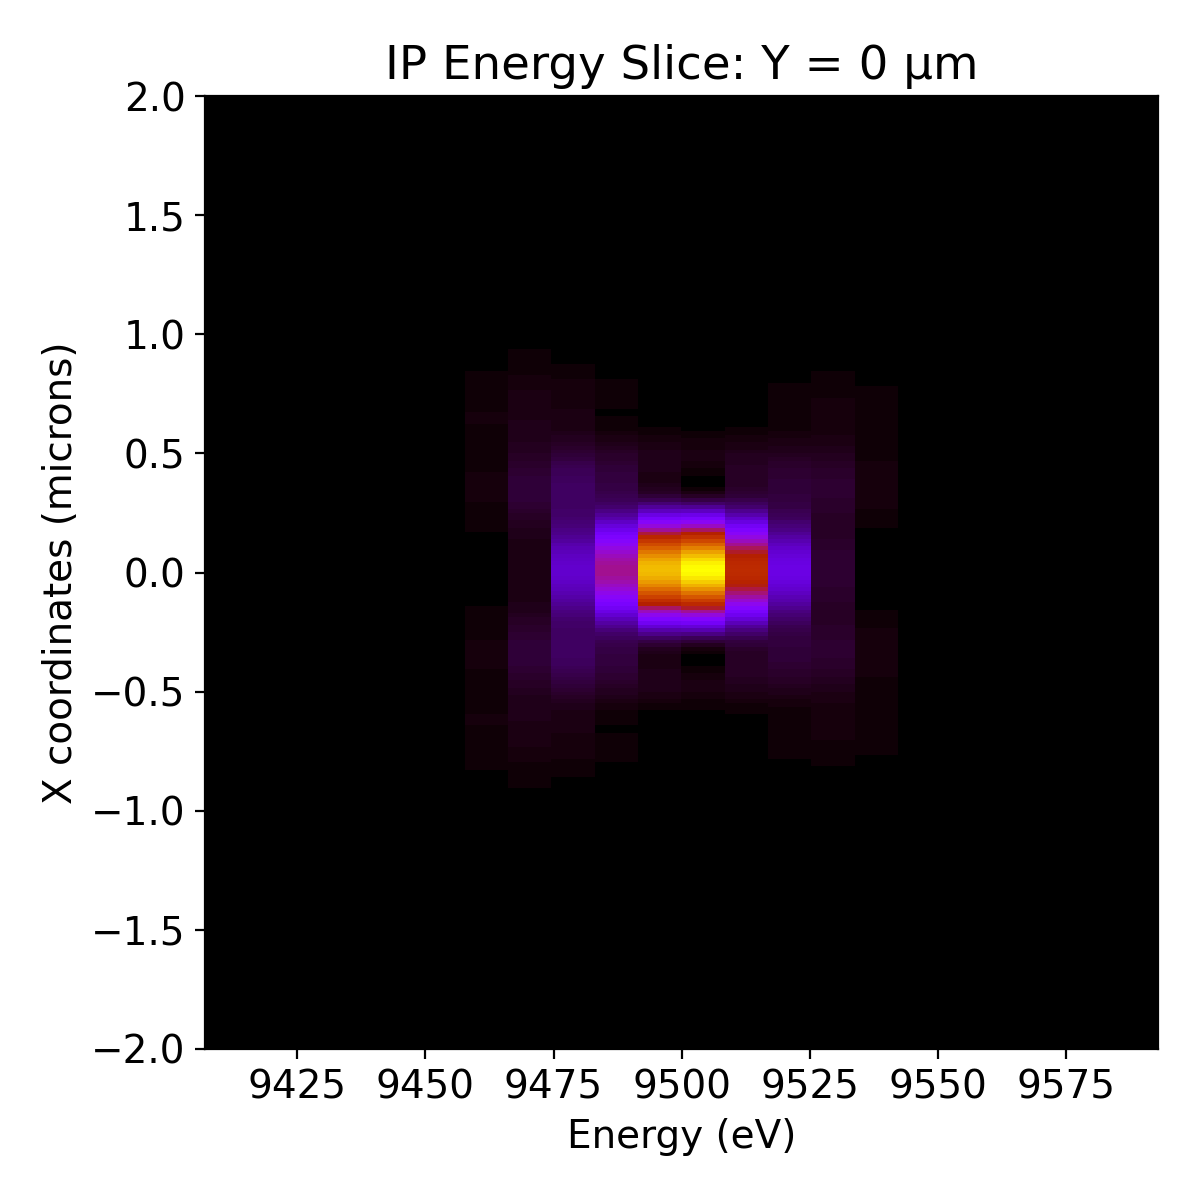

<IPython.core.display.Javascript object>


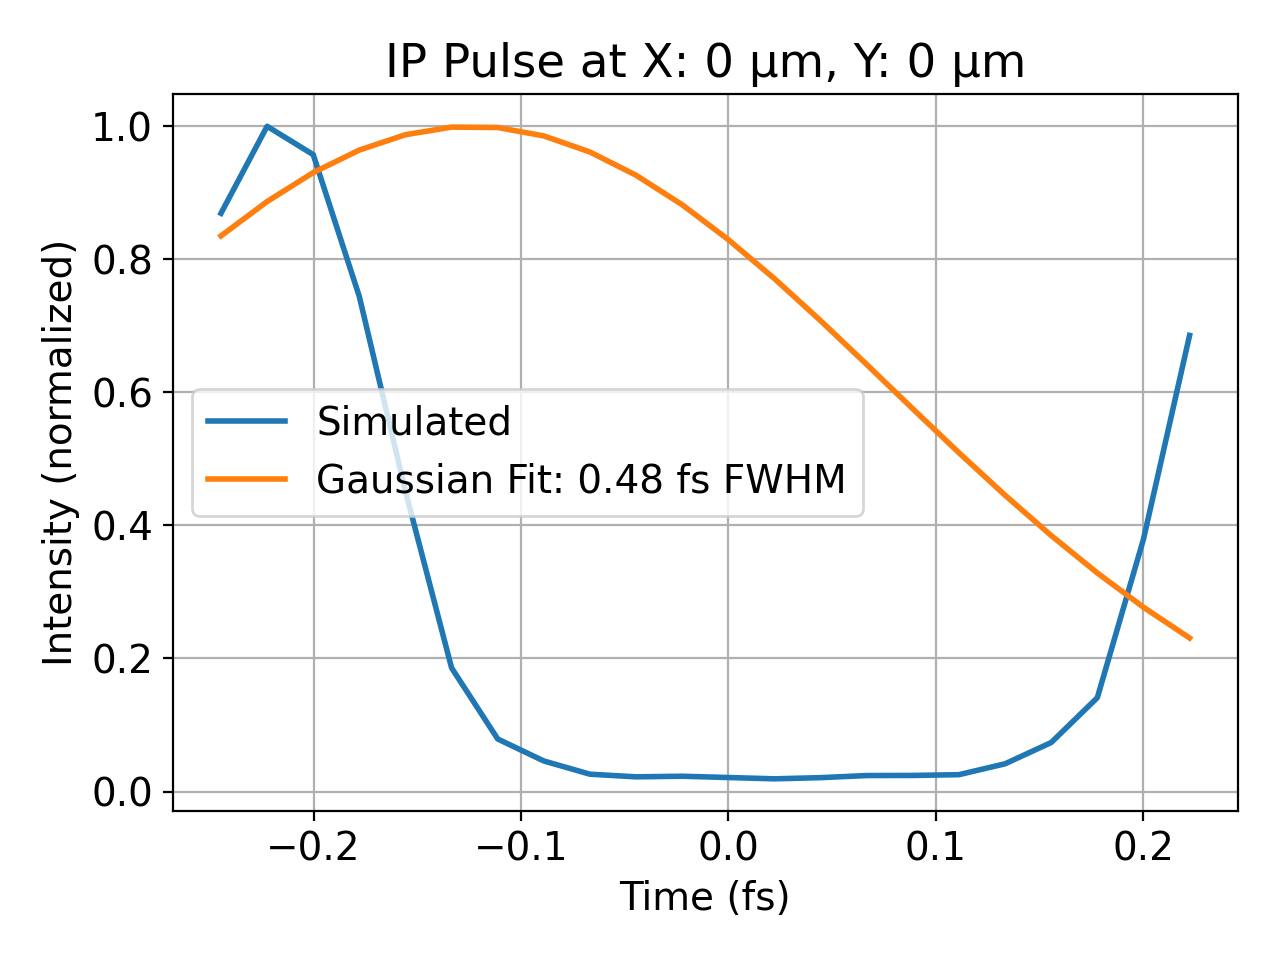

<IPython.core.display.Javascript object>


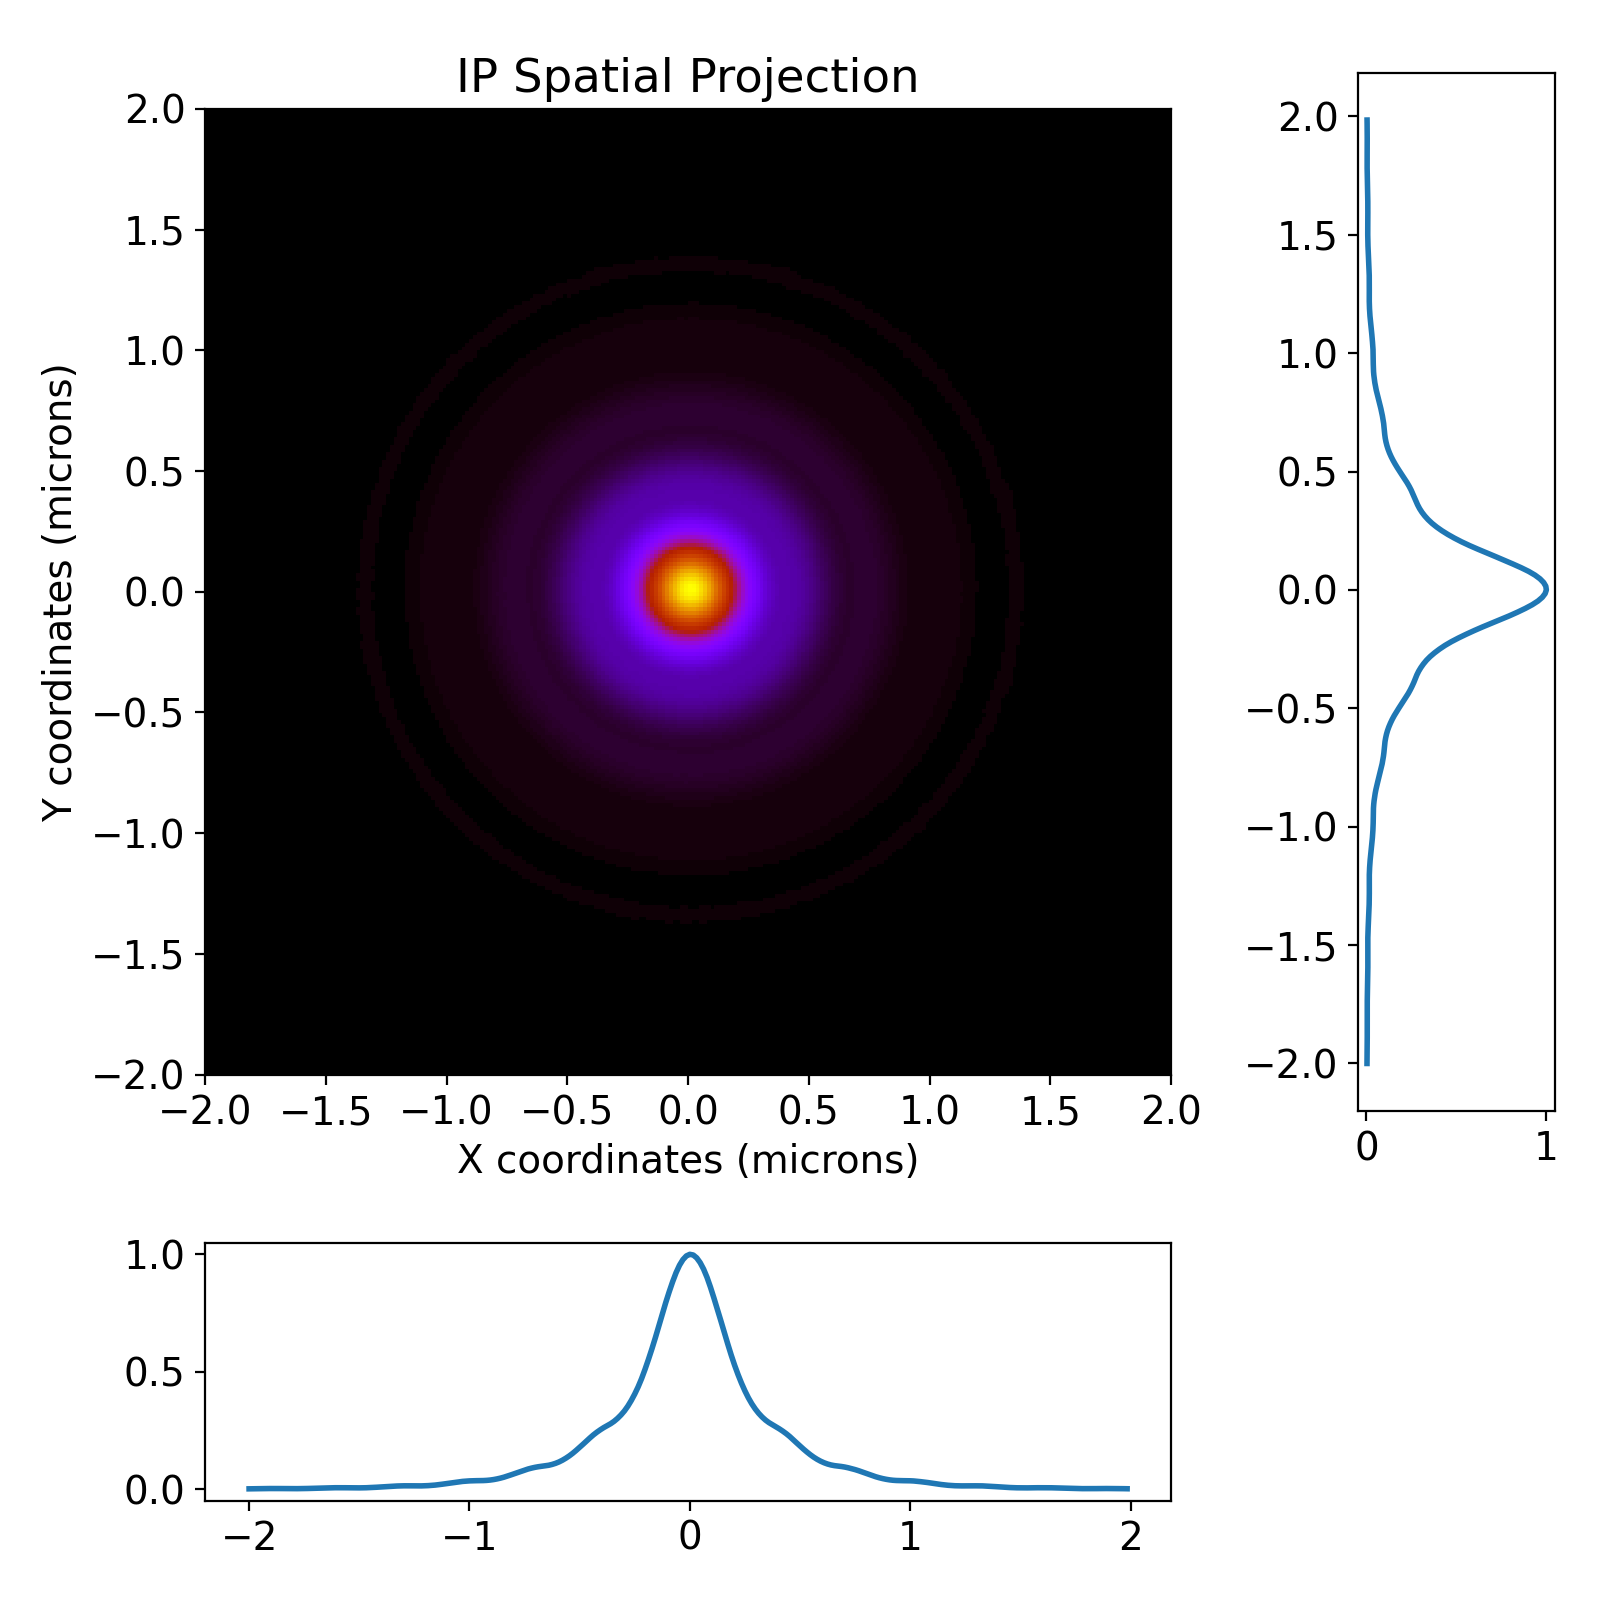

<IPython.core.display.Javascript object>


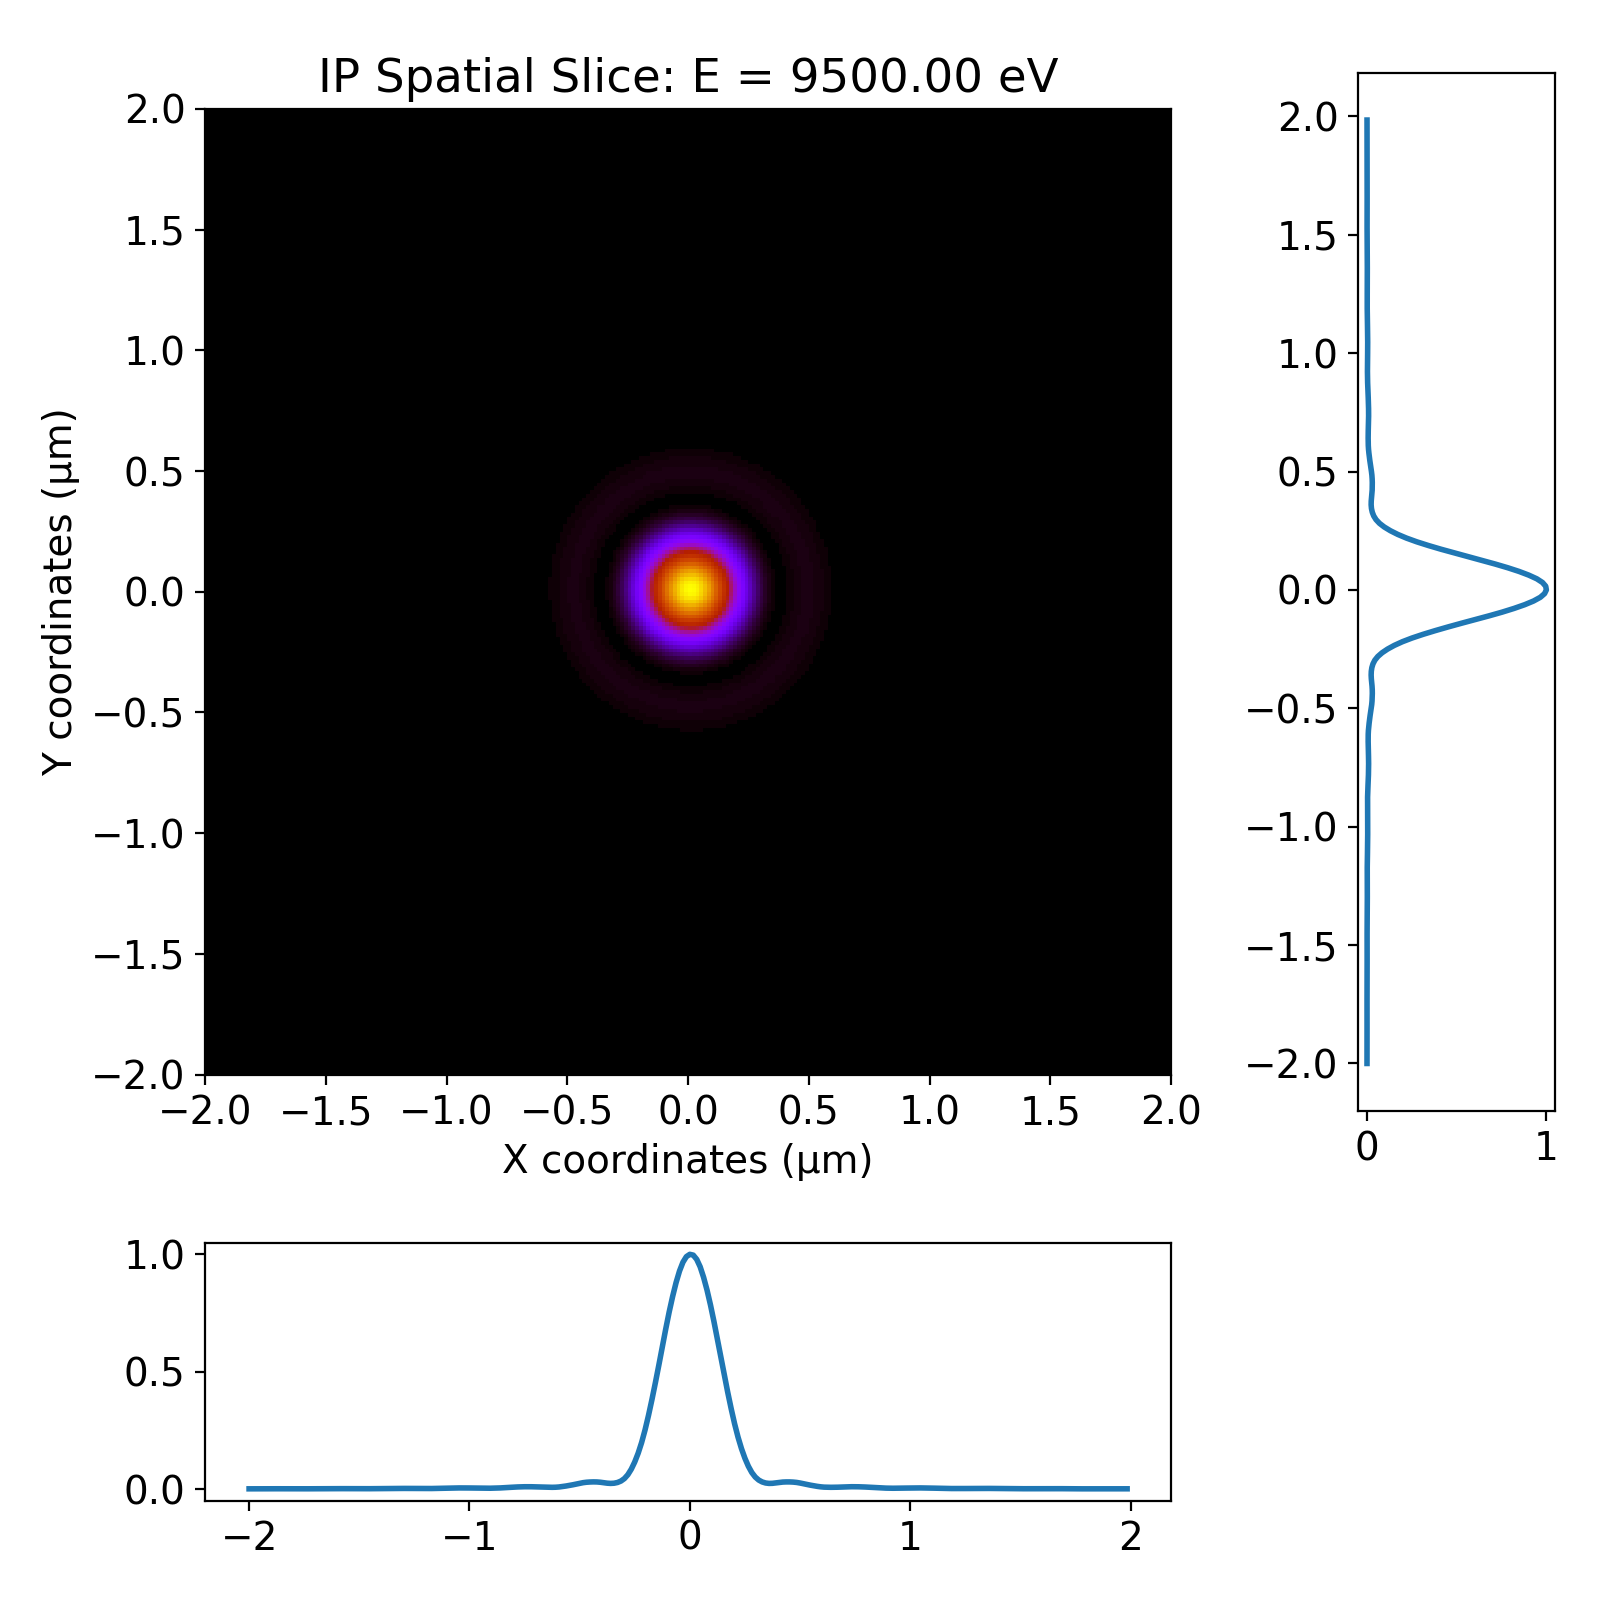

<IPython.core.display.Javascript object>


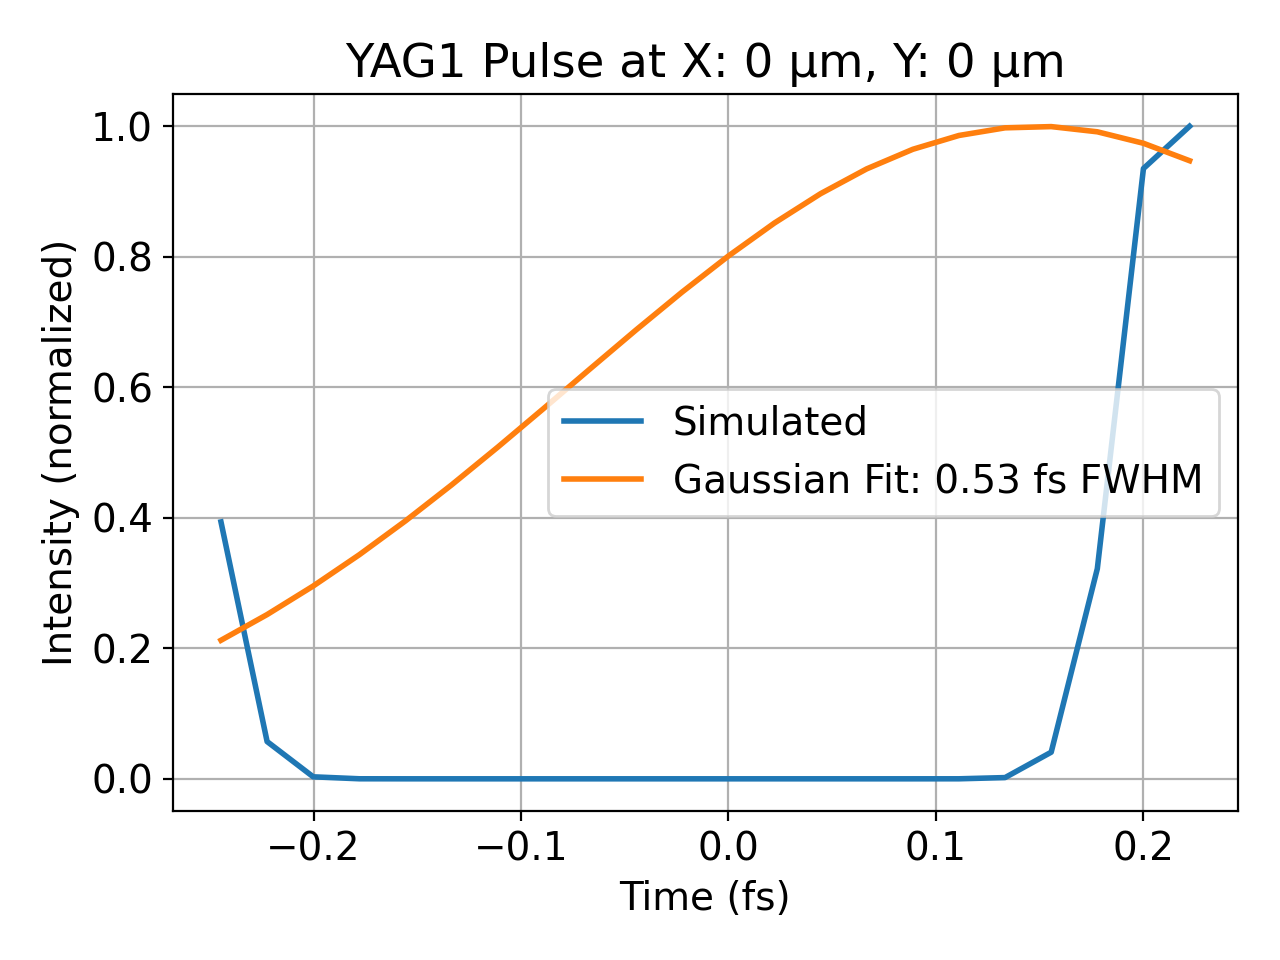

<IPython.core.display.Javascript object>


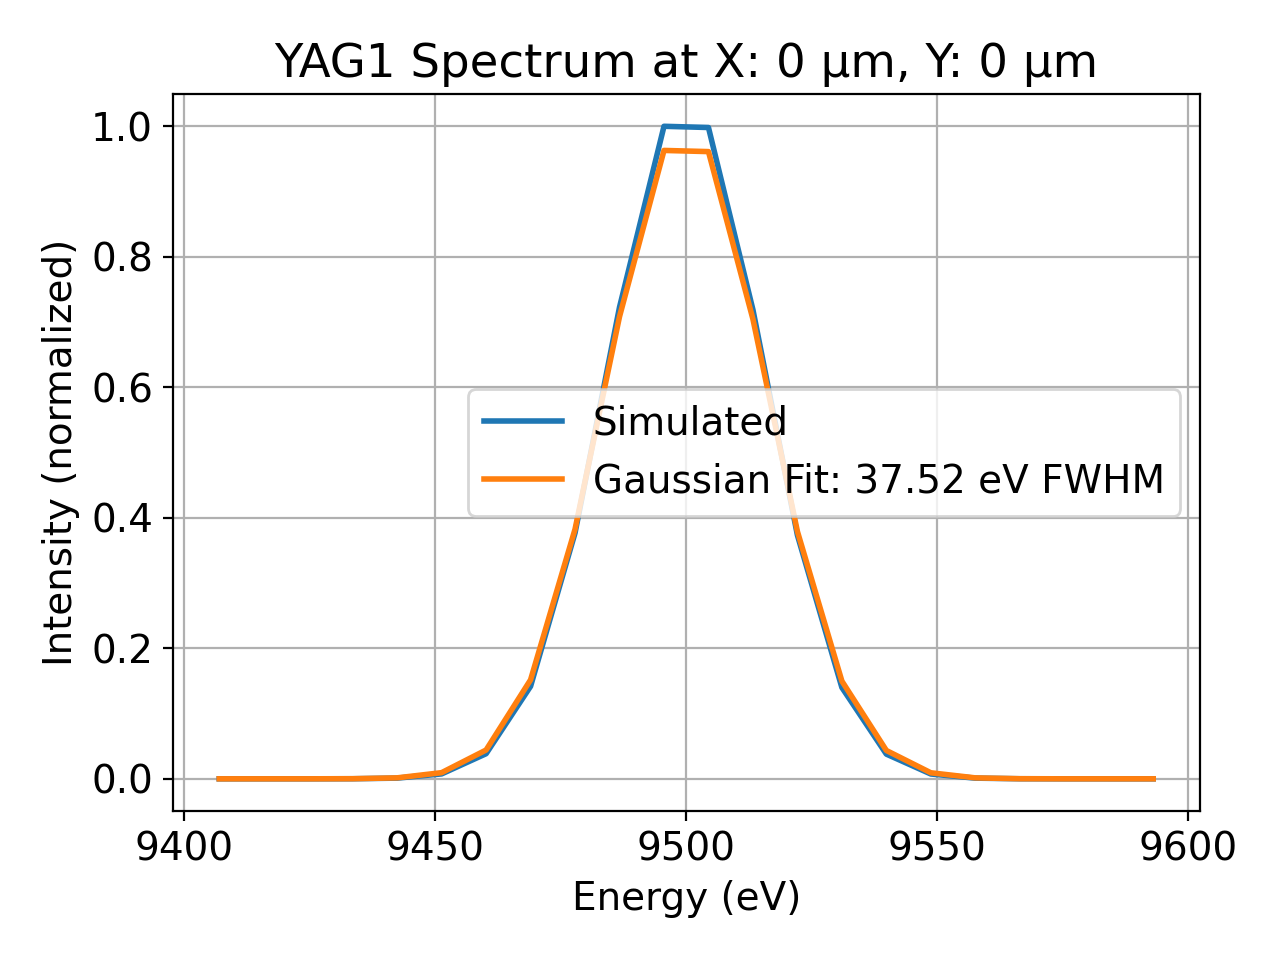

In [14]:
figure_path = '/Users/seaberg/OneDrive - SLAC National Accelerator Laboratory/Commissioning/SXR beam delivery/time_domain_figures/'

pulse_test.imshow_energy_slice('IP')
plt.savefig(figure_path+'CRL_energy_slice.png')
pulse_test.plot_pulse('IP')
pulse_test.imshow_projection('IP')
plt.savefig(figure_path+'CRL_integrated.png')
pulse_test.imshow_spatial_slice('IP',slice_pos=9500)
plt.savefig(figure_path+'CRL_spatial_slice.png')
pulse_test.plot_pulse('YAG1')
pulse_test.plot_spectrum('YAG1')
plt.savefig(figure_path+'CRL_spectrum.png')